# Q 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf


In [4]:
file1 = "Dataset_Q1.csv"

In [5]:
# Solution Code
def get_emails(file):
    
    df=pd.read_csv(file)
    
    for i in df.index :
        
        if i+1==len(df.index) :
             print(str(df.loc[i,'Roll Number'])+'@iitb.ac.in')
         
        else :
            print(str(df.loc[i,'Roll Number'])+'@iitb.ac.in',end=',')
            
           

In [14]:
print(get_emails(file1))       


20000003@iitb.ac.in,20000006@iitb.ac.in,20010000@iitb.ac.in,19020000@iitb.ac.in,20000304@iitb.ac.in
None


# Q 2

In [6]:
file2 = 'Dataset_Q2.csv'

In [7]:
df=pd.read_csv(file2)


In [13]:
df2 = pd.DataFrame()
df2['y'] = np.log(df[df.columns[2]])                   #ln(a)=y x1=ln(T)  x2=ln(1+f)
df2['x1'] = np.log(df[df.columns[1]])
df2['x2'] = np.log(df[df.columns[0]] + 1 )
df2

,y,x1,x2
0,4.404733,4.094511,0.009950
1,4.688339,4.750309,0.003992
2,4.967903,5.470294,0.003295
3,4.224826,3.571503,0.001499
4,4.847498,5.196451,0.006976
5,5.122151,5.885798,0.000890
6,4.513917,4.337291,0.073250
7,3.669922,2.349469,0.020783
8,5.206594,6.111046,0.009059


ln(a)= 1/2 ln(G(M+fM)/4pi*pi *T*T)

ln(a)=y 
x1=ln(T)
x2=ln(1+f)

Value of x

In [10]:
def func(X, m, b):
    x1,x2 = X
    return m*x1 + 0.5*m*x2 + b    #m=1/x b=0.5 m ln(MG/4pi*pi)

x1 = df2['x1']
x2 = df2['x2']
y = df2['y']

# initial guesses for m,b:
p0 = 8., 2.
coeffs, _ = (cf(func, (x1,x2), y, p0))   # coeffs=[m b]  m=1/x

print('x = ' , 1/coeffs[0])      

x =  2.4633804699830426


x!=1.5

value of G


In [14]:
x = 1/coeffs[0]
b = coeffs[1]
MG = (np.exp(2*x*b)*4*np.pi*np.pi)
print('G in terms of M = ', MG)

G in terms of M =  28848325.688088555


G=MG/M

# Graph

Text(0, 0.5, 'ln(a)(semimajor axis)')

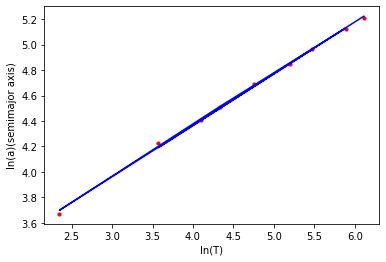

In [27]:
plt.scatter(x1,y,s=10,color='red')
plt.plot(x1,func((x1,x2),coeffs[0],coeffs[1]),label='Best Fit',color='b')
plt.xlabel('ln(T)')
plt.ylabel('ln(a)(semimajor axis)')
